In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import binom_test

In [19]:
pit = pd.read_csv('dataset/pit_stops.csv')
results = pd.read_csv('dataset/results.csv')
status = pd.read_csv('dataset/status.csv')
race = pd.read_csv('dataset/races.csv')
circuit = pd.read_csv('dataset/circuits.csv')
driver = pd.read_csv('dataset/drivers.csv')

In [20]:
# Merge tables
select_col = ['raceId','year','round','circuitId','name','date']
merge_df = pd.merge(pit, race[select_col], on='raceId', how='left')
select_col = ['raceId','driverId','positionOrder', 'laps', 'time','statusId']
merge_df = pd.merge(merge_df,results[select_col], on=['raceId','driverId'], how = 'left', suffixes=('_pit', '_result'))
merge_df = pd.merge(merge_df, status, on='statusId', how='left')
merge_df = pd.merge(merge_df, driver[['driverId', 'driverRef']], on = 'driverId', how='left')

In [21]:
merge_df

,raceId,driverId,stop,lap,time_pit,duration,milliseconds,year,round,circuitId,name,date,positionOrder,laps,time_result,statusId,status,driverRef
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,11,57,\N,11,+1 Lap,alguersuari
1,841,30,1,1,17:05:52,25.021,25021,2011,1,1,Australian Grand Prix,2011-03-27,19,19,\N,4,Collision,michael_schumacher
2,841,17,1,11,17:20:48,23.426,23426,2011,1,1,Australian Grand Prix,2011-03-27,5,58,+38.171,1,Finished,webber
3,841,4,1,12,17:22:34,23.251,23251,2011,1,1,Australian Grand Prix,2011-03-27,4,58,+31.772,1,Finished,alonso
4,841,13,1,13,17:24:10,23.842,23842,2011,1,1,Australian Grand Prix,2011-03-27,7,58,+1:25.186,1,Finished,massa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,1052,832,2,37,19:09:53,24.341,24341,2021,1,3,Bahrain Grand Prix,2021-03-28,8,56,+67.100,1,Finished,sainz
8066,1052,815,3,38,19:11:20,24.191,24191,2021,1,3,Bahrain Grand Prix,2021-03-28,5,56,+52.047,1,Finished,perez
8067,1052,830,2,39,19:12:13,23.848,23848,2021,1,3,Bahrain Grand Prix,2021-03-28,2,56,+0.745,1,Finished,max_verstappen
8068,1052,842,3,39,19:13:55,24.983,24983,2021,1,3,Bahrain Grand Prix,2021-03-28,17,52,\N,31,Retired,gasly


In [22]:
# Select Status
status_select = [1, 11, 12, 13, 14, 15, 16, 17, 18, 19]
merge_df.drop(merge_df[~merge_df['statusId'].isin(status_select)].index, inplace=True)

In [23]:
merge_df

,raceId,driverId,stop,lap,time_pit,duration,milliseconds,year,round,circuitId,name,date,positionOrder,laps,time_result,statusId,status,driverRef
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,11,57,\N,11,+1 Lap,alguersuari
2,841,17,1,11,17:20:48,23.426,23426,2011,1,1,Australian Grand Prix,2011-03-27,5,58,+38.171,1,Finished,webber
3,841,4,1,12,17:22:34,23.251,23251,2011,1,1,Australian Grand Prix,2011-03-27,4,58,+31.772,1,Finished,alonso
4,841,13,1,13,17:24:10,23.842,23842,2011,1,1,Australian Grand Prix,2011-03-27,7,58,+1:25.186,1,Finished,massa
6,841,20,1,14,17:25:17,22.603,22603,2011,1,1,Australian Grand Prix,2011-03-27,1,58,1:29:30.259,1,Finished,vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,1052,847,2,36,19:08:48,24.248,24248,2021,1,3,Bahrain Grand Prix,2021-03-28,14,55,\N,11,+1 Lap,russell
8065,1052,832,2,37,19:09:53,24.341,24341,2021,1,3,Bahrain Grand Prix,2021-03-28,8,56,+67.100,1,Finished,sainz
8066,1052,815,3,38,19:11:20,24.191,24191,2021,1,3,Bahrain Grand Prix,2021-03-28,5,56,+52.047,1,Finished,perez
8067,1052,830,2,39,19:12:13,23.848,23848,2021,1,3,Bahrain Grand Prix,2021-03-28,2,56,+0.745,1,Finished,max_verstappen


Status Meaning

+1 lap means that you have been overtaken by the race leader and that they are behind the race by 1 lap. So if the race has 30 laps , they are timed for 29 laps only hence +1.

If the winner is able to do it twice , it will be shown as +2 so on ...

In [24]:
merge_df.status.value_counts()

Finished    4234
+1 Lap      2181
+2 Laps      541
+3 Laps      106
+4 Laps       39
+5 Laps       27
+8 Laps        5
+6 Laps        2
+9 Laps        1
Name: status, dtype: int64

In [34]:
merge_df[merge_df['raceId'] == 841]['driverId'].value_counts()

153    3
17     3
4      3
13     3
18     3
20     2
814    2
816    2
67     2
2      2
1      2
808    2
16     2
15     2
10     1
Name: driverId, dtype: int64

In [35]:
merge_df[merge_df['raceId'] == 841][merge_df[merge_df['raceId'] == 841]['driverId'] == 10]

,raceId,driverId,stop,lap,time_pit,duration,milliseconds,year,round,circuitId,name,date,positionOrder,laps,time_result,statusId,status,driverRef
21,841,10,1,18,17:33:02,23.792,23792,2011,1,1,Australian Grand Prix,2011-03-27,15,49,\N,19,+9 Laps,glock


In [39]:
# get the maximum number of laps in each race
race_lap = merge_df[(merge_df['positionOrder'] == 1) & (merge_df['stop'] == 1)].reset_index(drop=True)[['raceId', 'year', 'laps']]
race_lap

,raceId,year,laps
0,841,2011,58
1,842,2011,56
2,843,2011,56
3,844,2011,58
4,845,2011,66
...,...,...,...
192,1044,2020,58
193,1045,2020,57
194,1046,2020,87
195,1047,2020,55


In [42]:
# divide the pit stop times per race by driver (rank 1 in each race to find max laps)
pit_stop = merge_df.groupby(by=['raceId', 'driverId'], as_index=False)[['stop', 'lap']].max()
pit_stop

,raceId,driverId,stop,lap
0,841,1,2,36
1,841,2,2,30
2,841,4,3,42
3,841,10,1,18
4,841,13,3,48
...,...,...,...,...
3402,1052,844,2,32
3403,1052,846,2,33
3404,1052,847,2,36
3405,1052,852,2,33


In [44]:
def count_proportion(df_pit: pd.DataFrame, df_race: pd.DataFrame, decimal: int) -> pd.DataFrame:
    """
    add column with the proportion during the total laps in each race
    :param decimal:
    :param df_pit: pit dataframe
    :param df_race: race dataframe
    :return:
    >>> df = pd.DataFrame({"raceId":[1,2,3], "lap":[25, 15, 29]})
    >>> race = pd.DataFrame({"raceId":[1,2,3], "laps":[50, 60, 58]})
    >>> count_proportion(df,race, 2)
       raceId  lap  laps  proportion
    0       1   25    50        0.50
    1       2   15    60        0.25
    2       3   29    58        0.50
    """
    df_new = df_pit.merge(df_race[['raceId', 'laps']], on='raceId', how='left', suffixes=('_once', '_total'))
    df_new['proportion'] = round(df_new['lap'] / df_new['laps'], decimal)
    return df_new

In [45]:
# 1 pit stop
pit_once = pit_stop[pit_stop['stop']==1]

pit_once_temp = count_proportion(pit_once, race_lap, 1)
pit_once_temp

,raceId,driverId,stop,lap,laps,proportion
0,841,10,1,18,58,0.3
1,843,39,1,23,56,0.4
2,846,20,1,16,78,0.2
3,846,24,1,32,78,0.4
4,846,155,1,34,78,0.4
...,...,...,...,...,...,...
1019,1047,844,1,22,55,0.4
1020,1047,846,1,10,55,0.2
1021,1047,847,1,10,55,0.2
1022,1047,848,1,10,55,0.2


In [46]:
# 2 pit stop
pit_twice = pit_stop[pit_stop['stop']==2]
# back to merge_df df to get the first pit stop data
pit_twice= pd.merge(pit_twice[['raceId', 'driverId']],merge_df[['raceId', 'driverId', 'stop', 'lap']], on=['raceId', 'driverId'], how = 'left')
# then we have all data with pit stop twice
pit_twice_temp = count_proportion(pit_twice, race_lap, 2)
pit_twice_temp

,raceId,driverId,stop,lap,laps,proportion
0,841,1,1,16,58,0.28
1,841,1,2,36,58,0.62
2,841,2,1,15,58,0.26
3,841,2,2,30,58,0.52
4,841,15,1,16,58,0.28
...,...,...,...,...,...,...
2776,1052,847,2,36,56,0.64
2777,1052,852,1,15,56,0.27
2778,1052,852,2,33,56,0.59
2779,1052,854,1,14,56,0.25


In [47]:
# 3 pit stops and each stop or proportion
pit_third = pit_stop[pit_stop['stop']==3]
pit_third= pd.merge(pit_third[['raceId', 'driverId']],merge_df[['raceId', 'driverId', 'stop', 'lap']], on=['raceId', 'driverId'], how = 'left')
pit_third_temp = count_proportion(pit_third, race_lap, 2)
pit_third_temp

,raceId,driverId,stop,lap,laps,proportion
0,841,4,1,12,58,0.21
1,841,4,2,27,58,0.47
2,841,4,3,42,58,0.72
3,841,13,1,13,58,0.22
4,841,13,2,31,58,0.53
...,...,...,...,...,...,...
2172,1052,815,2,19,56,0.34
2173,1052,815,3,38,56,0.68
2174,1052,822,1,16,56,0.29
2175,1052,822,2,30,56,0.54


In [48]:
# 4 pit stops and each stop or proportion
pit_four = pit_stop[pit_stop['stop']==4]
pit_four= pd.merge(pit_four[['raceId', 'driverId']],merge_df[['raceId', 'driverId', 'stop', 'lap']], on=['raceId', 'driverId'], how = 'left')
pit_four_temp = count_proportion(pit_four, race_lap, 2)
pit_four_temp

,raceId,driverId,stop,lap,laps,proportion
0,842,1,1,12,56,0.21
1,842,1,2,24,56,0.43
2,842,1,3,37,56,0.66
3,842,1,4,52,56,0.93
4,842,4,1,14,56,0.25
...,...,...,...,...,...,...
751,1045,830,4,46,57,0.81
752,1046,847,1,45,87,0.52
753,1046,847,2,62,87,0.71
754,1046,847,3,63,87,0.72


<AxesSubplot:>

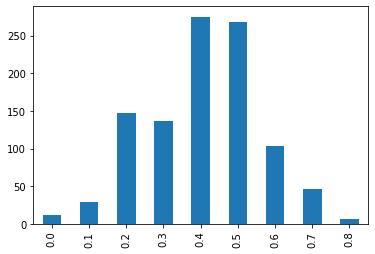

In [67]:
pit_once_temp.proportion.value_counts().sort_index().plot.bar()

In [70]:
pit_twice_temp[pit_twice_temp['stop'] == 1].proportion

0       0.28
2       0.26
4       0.28
6       0.28
8       0.24
        ... 
2771    0.21
2773    0.21
2775    0.23
2777    0.27
2779    0.25
Name: proportion, Length: 1390, dtype: float64

In [71]:
import seaborn as sns

<AxesSubplot:xlabel='proportion', ylabel='Count'>

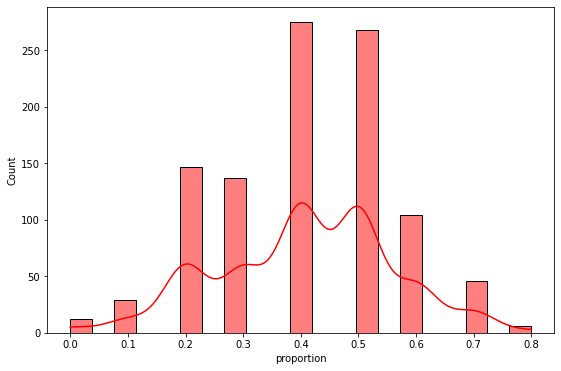

In [72]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(pit_once_temp.proportion,kde=True, color='red')

In [77]:
pit_once_temp.proportion

0       0.3
1       0.4
2       0.2
3       0.4
4       0.4
       ... 
1019    0.4
1020    0.2
1021    0.2
1022    0.2
1023    0.4
Name: proportion, Length: 1024, dtype: float64

In [55]:
shapiro(pit_once_temp.proportion)

ShapiroResult(statistic=0.9542100429534912, pvalue=2.4285948338301763e-17)

In [69]:
shapiro(pit_twice_temp[pit_twice_temp['stop'] == 1].proportion)

ShapiroResult(statistic=0.9835994243621826, pvalue=1.854452875982293e-11)

In [51]:
def plot_line_chart(df: pd.DataFrame, stop: int, plot_title):
    """
    This function the x and y co-ordinates to plot a line graph
    :param df: input dataframe ready for plotting
    :param stop: pit stop times
    :param plot_title: title for the line graph
    :return: plt
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    if stop == 1:
        df.plot(x='proportion', y='laps', ax=ax)
    elif stop >= 2:
        # first stop
        x1 = df[df['stop'] == 1]['proportion']
        y1 = df[df['stop'] == 1]['laps']
        plt.plot(x1, y1, label='first time')
        # second stop
        x2 = df[df['stop'] == 2]['proportion']
        y2 = df[df['stop'] == 2]['laps']
        plt.plot(x2, y2, label='second time')
        if stop >= 3:
            ax.set_ylim([0, 100])
            x3 = df[df['stop'] == 3]['proportion']
            y3 = df[df['stop'] == 3]['laps']
            # plotting the line 3 points
            plt.plot(x3, y3, label='third time')
            if stop == 4:
                ax.set_ylim([0, 100])
                x4 = df[df['stop'] == 4]['proportion']
                y4 = df[df['stop'] == 4]['laps']
                # plotting the line 4 points
                plt.plot(x4, y4, label='forth time')
    ax.set(xlabel='Proportion of total laps',
           ylabel='Race Count',
           title=plot_title)
    plt.legend()

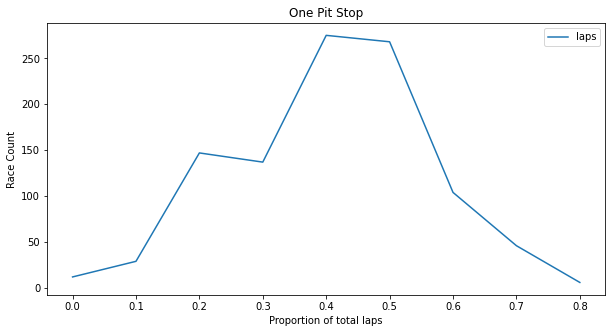

In [52]:
# plot for pit stop once
pit_once_plot = pit_once_temp.groupby(by=['proportion']).count().reset_index()
plot_line_chart(pit_once_plot, 1, 'One Pit Stop')